<a href="https://colab.research.google.com/github/aleksandrlozko/Optimization_Methods/blob/main/%D0%9B%D0%BE%D0%B7%D0%BA%D0%BE_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%2C_%D0%9A%D0%9C_83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

##**Збіжність модифікованого партан-методу найшвидшого спуску при мінімізації кореневої функції**


## Постановка задачі

Дослідити збіжність модифікованого партан-методу найшвидшого спуску при мінімізації кореневої функції  в залежності від:
1. Величини кроку h при обчисленні похідних.
2. Схеми обчислення похідних.
3. Виду методу одновимірного пошуку (ДСК-Пауелла або Золотого перетину).
4. Точності методу одновимірного пошуку.
5. Значення параметру в алгоритмі Свена.
6. Вигляду критерію закінчення 
$\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}$. 
7. Порівняти з методом найскорішого спуску.

Використати метод штрафних функцій (метод зовнішньої точки) для умовної оптимізації при розташуванні локального мінімума поза допустимої області (випукла/невипукла). 

## Анотація

Партан є скорочення від терміна parallel tangents (паралельні дотичні). На рис. 1 проілюстрована сутність цієї процедури для випадку квадратичної функції двох незалежних змінних. Р1 і Р2 - будь-які дві точки площини (х1 х2). 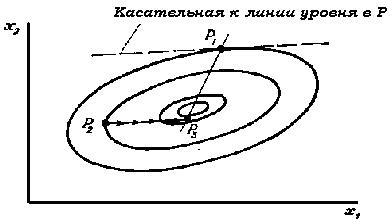

Рис. 1. Метод паралельних дотичних (Партан-метод) в двовимірному випадку.


---
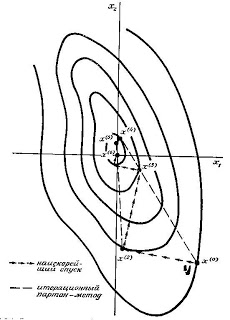

Рис. 2. Загальний Партан-алгоритм.


---

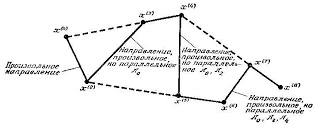

Рис. 3. Порівняння траєкторій методу найшвидшого спуску, ітераційного і модифікованого Партан-методу.


---


Модифікований Партан-метод будується так. З $w_0$ робиться два кроки найшвидшого спуску. Отримуємо $w_1$ і $w_2$. Далі виконуємо мінімізацію у напрямку $w_2-w_0$. Отримуємо $w_3$. Робимо найшвидшого спуску з $w_3$. Отримуємо $w_4$. Виконуємо мінімізацію у напрямку $w_4-w_2$, отримуємо $w_5$ і т.д.. Парні $w_{2k}$ отримуємо найшвидшим спуском з $w_{2k-1}$, непарні $w_{2k+1}$ мінімізаціей з $w_{2k-2}$ в напрямку $w_{2k}-w_{2k-2}$.

Як показала практика, модифікований Партан-метод в задачах навчання працює краще, ніж k - партан.





## Вступ

***Головним завданням даної курсової роботи є*** дослідження збіжності модифікованого партан-методу найшвидшого спуску, суть якого було описано в попередньому підрозділі, в залежності від певних умов, таких як величина кроку h при обчисленні похідних, вид методу одновимірного пошуку, точності методу одновимірного пошуку та значення параметру в алгоритмі Свена.


## Імпорт бібліотек та допоміжних функцій

1.   numpy
2.   numpy.linalg.norm
3.   matplotlib.pyplot
4.   mpl_toolkits.mplot3d.Asex3D
5.   time

In [ ]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

## Основні функції

Коренева функція: $~~z = (10(x - y)^{2} + (x-1)^2)^{1/4}$.

In [ ]:
def root_func(x, y):
  return pow(10 * (x - y)**2 + (x - 1)**2, 1/4)

x_arr = np.arange(-1.5, 2.5, 0.01)
y_arr = np.arange(-2, 3, 0.01)
root_func_arr = np.array([[root_func(x, y) for x in x_arr] for y in y_arr])

Частинні похідні кореневої функції

In [ ]:
def dRootdx(x, y):
  return 1/4 * pow((10 * (x - y)**2 + (x - 1)**2), -3/4) * (20 * (x - y) + 2 * (x - 1))


def dRootdy(x, y):
  return 1/4 * pow((10 * (x - y)**2 + (x - 1)**2), -3/4) * (- 20 * (x - y))

## Обчислення

Побудова графіка кореневої функції.

https://matplotlib.org/

https://mipt-stats.gitlab.io/courses/python/06_matplotlib.html

In [ ]:
def root_func_graph():
  fig = plt.figure()
  fig.suptitle("Графік кореневої функції:")
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr)

  plt.show()

Метод золотого перетину.

http://dit.isuct.ru/IVT/sitanov/Literatura/M171/Pages/Glava1_3.htm

In [ ]:
def gold_ratio(f, a, b, eps):
  if a > b:
    a, b = b, a

  x1 = a + 0.382 * (b - a)
  x2 = b - 0.382 * (b - a)
  A = f(x1)
  B = f(x2)
  
  while b - a > eps:
    if A < B:
      b = x2
      if b - a < eps:
        break

      x2 = x1
      B = A
      x1 = a + 0.382 * (b - a)
      A = f(x1)
    else:
      a = x1
      if b - a < eps:
        break

      x1 = x2
      A = B
      x2 = b - 0.382 * (b - a)
      B = f(x2)

  return (a + b) / 2

Функція **descent_optim1** реалізує метод найскорішого спуску з оптимальним кроком на прикладі кореневої функції.

http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0

---
Параметри функції: lmd - початковий крок, (x_init, y_init) - початкова точка, eps - точність розрахунку, eps_lmd - точність одновимірного пошуку (метод золотого перетину), t - обмеження виконання по часу.

Критерій закінчення: $||\nabla f(x^{(k)})|| \leq \varepsilon$.


In [ ]:
def descent_optim1(lmd, x_init, y_init, eps, eps_lmd, t):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr, color='yellow', alpha=0.5)

  a = 0
  b = 2 * lmd

  count = 0
  start = time.time()

  grad_norm = norm([dRootdx(x_init, y_init), dRootdy(x_init, y_init)])
  
  ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init + .08, y_init + .06, root_func(x_init, y_init) + .1, 'Початкова точка', fontsize=12)

  while grad_norm > eps:
    count += 1
    ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=2)

    def f1(lmd):
      return root_func(x_init - lmd * dRootdx(x_init, y_init), y_init - lmd * dRootdy(x_init, y_init))
    
    lmd = gold_ratio(f1, a, b, eps_lmd)

    x_init = x_init - lmd * dRootdx(x_init, y_init)
    y_init = y_init - lmd * dRootdy(x_init, y_init)

    grad_norm = norm([dRootdx(x_init, y_init), dRootdy(x_init, y_init)])    

    if time.time() - start > t:      
      break

  ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init + .1, y_init + .1, root_func(x_init, y_init) + .06, 'Отримана точка', fontsize=12)
  
  plt.show()
  
  print('\nОтримана точка: (%.5f, %.5f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' %count)
  print(r'Норма градієнта: %.2f' %grad_norm)

Функція **descent_optim2** реалізує метод найскорішого спуску з оптимальним кроком на прикладі кореневої функції.

---
Параметри функції: lmd - початковий крок, (x_init, y_init) - початкова точка, eps - точність розрахунку, eps_lmd - точність одновимірного пошуку (метод золотого перетину).

Критерій закінчення: $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}$.


In [ ]:
def descent_optim2(lmd, x_init, y_init, eps, eps_lmd):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr, color='yellow', alpha=0.5)

  a = 0
  b = 2 * lmd

  count = 0
  start = time.time()

  x_delta = norm([lmd * dRootdx(x_init, y_init), lmd * dRootdy(x_init, y_init)]) / norm([x_init, y_init])
  f_delta = abs(root_func(x_init - lmd * dRootdx(x_init, y_init), y_init - lmd * dRootdy(x_init, y_init)) - root_func(x_init, y_init))
  
  ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init - 1.1, y_init + .06, root_func(x_init, y_init) + .25, 'Початкова точка', fontsize=12)

  while x_delta > eps or f_delta > eps:
    count += 1
    ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=2)

    def f1(lmd):
      return root_func(x_init - lmd * dRootdx(x_init, y_init), y_init - lmd * dRootdy(x_init, y_init))
    
    lmd = gold_ratio(f1, a, b, eps_lmd)

    x_init = x_init - lmd * dRootdx(x_init, y_init)
    y_init = y_init - lmd * dRootdy(x_init, y_init)

    x_delta = norm([lmd * dRootdx(x_init, y_init), lmd * dRootdy(x_init, y_init)]) / norm([x_init, y_init])
    f_delta = abs(root_func(x_init - lmd * dRootdx(x_init, y_init), y_init - lmd * dRootdy(x_init, y_init)) - root_func(x_init, y_init)) 

  ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init + .1, y_init + .1, root_func(x_init, y_init) + .06, 'Отримана точка', fontsize=12)
  
  plt.show()
  
  print('\nОтримана точка: (%.5f, %.5f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' %count)

Функція **min_with_direction** мінімізує кореневої функції у напрямку (x2, y2) - (x1, y1) з використанням методу золотого перетину. 

eps_lmd - точність розрахунку та одновимірного пошуку.

Параметризація прямої, що проходить через точки (x1, y1) та (x2, y2).

In [ ]:
def min_with_direction(x1, y1, x2, y2, eps_lmd):
  if x1 == x2:
    x1, y1 = y1, x1
    x2, y2 = y2, x2

  # Параметризація прямої, що проходить через точки (x1, y1) та (x2, y2)
  def direction(t):
    k = (y2 - y1) / (x2 - x1)
    b = y1 - k * x1
    return k * t + b


  # Звуження кореневої функції на пряму, що проходить через точки (x1, y1) та (x2, y2) 
  def root_func_with_direction(t):
    if x1 != x2:
      return root_func(t, direction(t))      

    return root_func(direction(t), t)
    

  if x1 != x2:
    x = gold_ratio(root_func_with_direction, x1, x2, eps_lmd)
    y = direction(x)
  else:
    y = gold_ratio(root_func_with_direction, x1, x2, eps_lmd)
    x = direction(y)

  return (x, y)

Візуалізація одновимірного пошуку по відрізку між точками (x1, y1) та (x2, y2).

In [ ]:
def min_with_direction_graph(x1, y1, x2, y2, eps_lmd):
  # виконується коректно для x1 < x2

  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr, color='y', alpha=0.5)

  def direction(t):
    k = (y2 - y1) / (x2 - x1)
    b = y1 - k * x1
    return k * t + b

  def root_func_with_direction(t):
    return root_func(t, direction(t))

  y_arr_with_dir = np.array([direction(x) for x in x_arr])
  root_func_arr_with_dir = np.array([[root_func(x, y) for x in x_arr] for y in y_arr_with_dir])
  
  for x in x_arr:
    ax.scatter(x, direction(x), root_func(x, direction(x)), c='blue', s=2, alpha=0.5)

  for x in np.arange(x1, x2, 0.1):
    ax.scatter(x, direction(x), 0, c='blue', s=5, alpha=0.5)

  x_min, y_min = min_with_direction(x1, y1, x2, y2, eps_lmd)

  ax.scatter(x_min, y_min, root_func(x_min, y_min), c='blue', s=40)
  ax.text(x_min - .3, y_min - 2, root_func(x_min, y_min), f'Точка мінімуму\nза напрямком\n{(x2, y2)} - {(x1, y1)}', fontsize=12)

  plt.show()

Функція **mod_partan1** реалізує партан метод на прикладі кореневої функції.

https://scask.ru/a_book_vap.php?id=122

---
Параметри функції: lmd - початковий крок, (x_init, y_init) - початкова точка, eps - точність розрахунку, eps_lmd - точність одновимірного пошуку (метод золотого перетину), t - обмеження виконання по часу.

Критерій закінчення: $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}$.

In [ ]:
def mod_partan1(lmd, x0, y0, eps, eps_lmd, t):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr, color='y', alpha=0.5)

  # відображення початкової точки
  ax.scatter(x0, y0, root_func(x0, y0), c='blue', s=30)
  ax.text(x0 - 1.1, y0 + .06, root_func(x0, y0) + .25, 'Початкова точка', fontsize=12)
  
  # межі оптимізації кроку (метод золотого перерізу)
  a = 0
  b = 2 * lmd

  # пошук та відображення точки (x1, y1)
  def f1(lmd):
    return root_func(x0 - lmd * dRootdx(x0, y0), y0 - lmd * dRootdy(x0, y0))
  lmd = gold_ratio(f1, a, b, eps_lmd)
  x1 = x0 - lmd * dRootdx(x0, y0)
  y1 = y0 - lmd * dRootdy(x0, y0)
  ax.scatter(x1, y1, root_func(x1, y1), c='blue', s=2)
  

  # пошук та відображення точки (x2, y2)
  def f1(lmd):
    return root_func(x1 - lmd * dRootdx(x1, y1), y1 - lmd * dRootdy(x1, y1))
  x2 = x1 - lmd * dRootdx(x1, y1)
  y2 = y1 - lmd * dRootdy(x1, y1)
  ax.scatter(x2, y2, root_func(x2, y2), c='blue', s=2)

  x_delta = norm([lmd * dRootdx(x2, y2), lmd * dRootdy(x2, y2)]) / norm([x2, y2])
  f_delta = abs(root_func(x2 - lmd * dRootdx(x2, y2), y2 - lmd * dRootdy(x2, y2)) - root_func(x2, y2))
 
  count = 2
  start = time.time()

  while x_delta > eps or f_delta > eps:
    count += 2

    # пошук та відображення точок (x(2n + 1), y(2n + 1)), n > 0
    # для зручності позначені як (x3, y3)
    x3, y3 = min_with_direction(x0, y0, x2, y2, eps_lmd)
    ax.scatter(x3, y3, root_func(x3, y3), c='blue', s=2)

    x0, y0 = x2, y2
    x1, y1 = x3, y3    
    

    # пошук та відображення точок (x(2n), y(2n)), n > 1
    # для зручності позначені як (x2, y2)
    def f1(lmd):
      return root_func(x1 - lmd * dRootdx(x1, y1), y1 - lmd * dRootdy(x1, y1))
    
    lmd = gold_ratio(f1, a, b, eps_lmd)

    x2 = x1 - lmd * dRootdx(x1, y1)
    y2 = y1 - lmd * dRootdy(x1, y1)
    ax.scatter(x2, y2, root_func(x2, y2), c='blue', s=2)

    x_delta = norm([lmd * dRootdx(x2, y2), lmd * dRootdy(x2, y2)]) / norm([x2, y2])
    f_delta = abs(root_func(x2 - lmd * dRootdx(x2, y2), y2 - lmd * dRootdy(x2, y2)) - root_func(x2, y2)) 

    if time.time() - start > t:
      break
  
  # відображення отриманої точки
  ax.scatter(x2, y2, root_func(x2, y2), c='blue', s=30)
  ax.text(x2 + .1, y2 + .1, root_func(x0, y0) + .06, 'Отримана точка', fontsize=12)
  
  plt.show()

  print('\nОтримана точка: (%.5f, %.5f)' % (x0, y2))
  print('Кількість ітерацій: %d' %count)

Функція **mod_partan2** реалізує партан метод на прикладі кореневої функції.

---
Параметри функції: lmd - початковий крок, (x_init, y_init) - початкова точка, eps - точність розрахунку, eps_lmd - точність одновимірного пошуку (метод золотого перетину), t - обмеження виконання по часу.

Критерій закінчення: $||\nabla f(x^{(k)})|| \leq \varepsilon$ .

In [ ]:
def mod_partan2(lmd, x0, y0, eps, eps_lmd, t):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr, color='y', alpha=0.5)

  # відображення початкової точки
  ax.scatter(x0, y0, root_func(x0, y0), c='blue', s=30)
  ax.text(x0 - 1.1, y0 + .06, root_func(x0, y0) + .25, 'Початкова точка', fontsize=12)
  
  # межі оптимізації кроку (метод золотого перерізу)
  a = 0
  b = 2 * lmd

  # пошук та відображення точки (x1, y1)
  def f1(lmd):
    return root_func(x0 - lmd * dRootdx(x0, y0), y0 - lmd * dRootdy(x0, y0))
  lmd = gold_ratio(f1, a, b, eps_lmd)
  x1 = x0 - lmd * dRootdx(x0, y0)
  y1 = y0 - lmd * dRootdy(x0, y0)
  ax.scatter(x1, y1, root_func(x1, y1), c='blue', s=2)
  

  # пошук та відображення точки (x2, y2)
  def f1(lmd):
    return root_func(x1 - lmd * dRootdx(x1, y1), y1 - lmd * dRootdy(x1, y1))
  x2 = x1 - lmd * dRootdx(x1, y1)
  y2 = y1 - lmd * dRootdy(x1, y1)
  ax.scatter(x2, y2, root_func(x2, y2), c='blue', s=2)

  grad_norm = norm([dRootdx(x2, y2), dRootdy(x2, y2)])
 
  count = 2
  start = time.time()

  while grad_norm > eps:
    count += 2

    # пошук та відображення точок (x(2n + 1), y(2n + 1)), n > 0
    # для зручності позначені як (x3, y3)
    x3, y3 = min_with_direction(x0, y0, x2, y2, eps_lmd)
    ax.scatter(x3, y3, root_func(x3, y3), c='blue', s=2)

    x0, y0 = x2, y2
    x1, y1 = x3, y3    
    

    # пошук та відображення точок (x(2n), y(2n)), n > 1
    # для зручності позначені як (x2, y2)
    def f1(lmd):
      return root_func(x1 - lmd * dRootdx(x1, y1), y1 - lmd * dRootdy(x1, y1))
    
    lmd = gold_ratio(f1, a, b, eps_lmd)

    x2 = x1 - lmd * dRootdx(x1, y1)
    y2 = y1 - lmd * dRootdy(x1, y1)
    ax.scatter(x2, y2, root_func(x2, y2), c='blue', s=2)

    grad_norm = norm([dRootdx(x2, y2), dRootdy(x2, y2)])

    if time.time() - start > t:
      break
  
  # відображення отриманої точки
  ax.scatter(x2, y2, root_func(x2, y2), c='blue', s=30)
  ax.text(x2 + .1, y2 + .1, root_func(x0, y0) + .06, 'Отримана точка', fontsize=12)
  
  plt.show()

  print('\nОтримана точка: (%.5f, %.5f)' % (x0, y2))
  print('Кількість ітерацій: %d' %count)

## Відображення результатів

Побудуємо графік кореневої функції. Неважко перевірити, що точкою глобального мінімуму кореневої функції є точка (1, 1), в якій вона набуває значення 0.

Графік 1


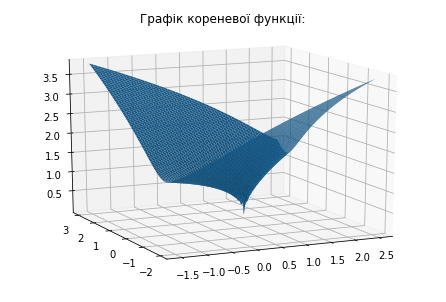

In [ ]:
print('Графік 1')
root_func_graph()

Для мінімізації кореневої функції застосуємо метод найскорішого спуску з оптимальним кроком і критерієм закінчення $||\nabla f(x^{(k)})|| \leq \varepsilon$.

---
**Параметри:** крок lmd = 0.01, початкова точка (-1.5, 3), точність розрахунку eps = 0.001, точність одновимірного пошуку (метод золотого перетину) eps_lmd = 0.0001.

**Зауваження 1:** якщо протягом 15 секунд функція не досягає критерію закінчення, вона перериває своє виконання, виводить поточне значення $||\nabla f(x^{(k)})||$ та отриману точку. 

**Зауваження 2:** наведене обмеження за часом є обмеженням саме на пошук мінімуму (тобто виконання циклу while); загальний час виконання функції (пошук мінімуму та візуалізація результату) може істотно перевищувати вказане обмеження. 

Графік 2


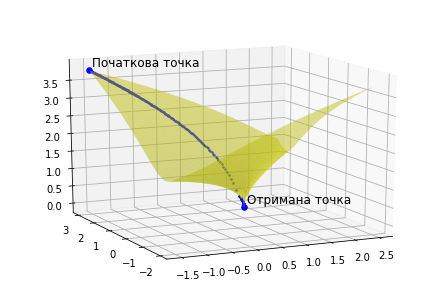


Отримана точка: (0.99834, 0.99885)
Кількість ітерацій: 6777
Норма градієнта: 38.06
Час виконання: 30 сек


In [ ]:
print('Графік 2')

start = time.time()
descent_optim1(0.01, -1.5, 3, 0.001, 0.0001, 15)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Змінимо критерій закінчення на $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}$ та початкову точку на (2.5, -2). 
 
 Знімимо також обмеження за часом виконання.

Графік 3


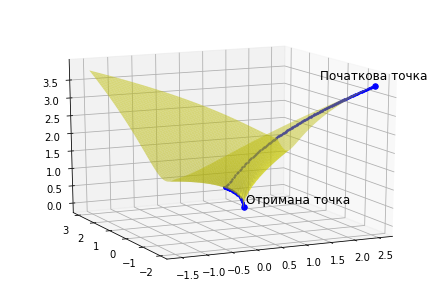


Отримана точка: (0.99781, 0.99778)
Кількість ітерацій: 285
Час виконання: 1 сек


In [ ]:
print('Графік 3')

start = time.time()
descent_optim2(0.01, 2.5, -2, 0.001, 0.00001)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Для більш ефективної мінімізації застосовується партан-метод найскорішого спуску. Для реалізації партан-методу на прикладі кореневої функції створимо метод мінімізації кореневої функції вздовж певного напрямку (x2, y2) - (x1, y1).

Реалізуємо такий метод у функції min_root_with_direction.

Перевіримо роботу функції min_with_direction на прикладі мінімізації кореневої функції у напрямку (3, 1.5) - (-2, -1), точність одновимірного пошуку (метод золотого перетину) eps_lmd = 0.001.

In [ ]:
eps_lmd = 0.001
x1, y1 = -2, -1
x2, y2 = 3, 1.5
print(min_with_direction(x1, y1, x2, y2, eps_lmd))

(0.2857743029911654, 0.1428871514955827)


Графік 4


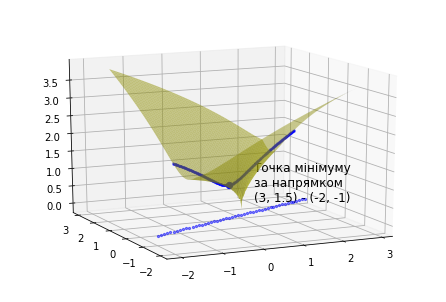

In [ ]:
print('Графік 4')
min_with_direction_graph(x1, y1, x2, y2, eps_lmd)

Зокрема, функція min_with_direction коректно працює у випадку x1 == x2:

In [ ]:
x1, y1 = 1, -1
x2, y2 = 1, 2
print(min_with_direction(x1, y1, x2, y2, 0.001))

(0.9999938049978077, 1.0)


Зауважимо, що існує два типи партан-методу: ітераційний та модифікований. У рамках даної роботи буде розглянутий саме модифікований партан-метод. 

Модифікований партан-метод з критерієм закінчення $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}$ .

---
**Параметри:** початковий крок lmd = 0.01, початкова точка (2.5, -2), точність розрахунку eps = 0.001, точність одновимірного пошуку (метод золотого перетину) eps_lmd = 0.00001.

**Зауваження 1:** якщо протягом 15 секунд функція не досягає критерію закінчення, вона перериває своє виконання, виводить поточне значення $||\nabla f(x^{(k)})||$ та отриману точку. 

**Зауваження 2:** наведене обмеження за часом є обмеженням саме на пошук мінімуму (тобто виконання циклу while); загальний час виконання функції (пошук мінімуму та візуалізація результату) може істотно перевищувати вказане обмеження. 

Графік 5


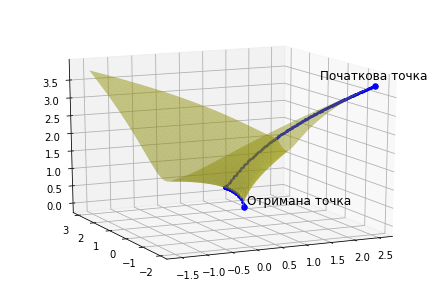


Отримана точка: (1.00011, 1.00009)
Кількість ітерацій: 658
Час виконання: 3 сек


In [ ]:
print('Графік 5')

start = time.time()
mod_partan1(0.01, 2.5, -2, 0.001, 0.00001, 15)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Змінимо початкову точку на (-1.5, 3), а також зменшимо точнсть одновимірного пошуку до eps_lmd = 0.0001 .

Графік 6


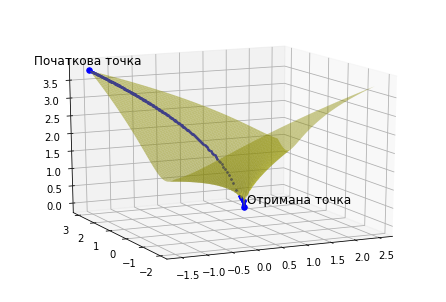


Отримана точка: (1.00007, 0.99974)
Кількість ітерацій: 862
Час виконання: 4 сек


In [ ]:
print('Графік 6')

start = time.time()
mod_partan1(0.01, -1.5, 3, 0.001, 0.0001, 15)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Змінимо критерій закінчення на $||\nabla f(x^{(k)})|| \leq \varepsilon$.


**Параметри:** початковий крок lmd = 0.01, початкова точка (2.5, -2), точність розрахунку eps = 0.001, точність одновимірного пошуку (метод золотого перетину) eps_lmd = 0.00001.

Графік 7


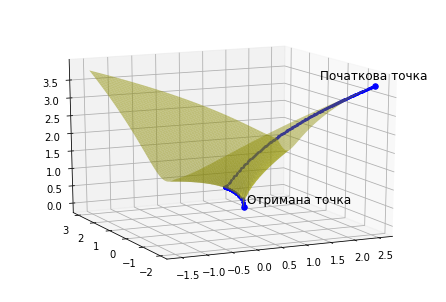


Отримана точка: (0.99952, 0.99955)
Кількість ітерацій: 6952
Час виконання: 30 сек


In [ ]:
print('Графік 7')

start = time.time()
mod_partan2(0.01, 2.5, -2, 0.001, 0.00001, 15)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

**Параметри:** початковий крок lmd = 0.01, початкова точка (-1.5, 3), точність розрахунку eps = 0.001, точність одновимірного пошуку (метод золотого перетину) eps_lmd = 0.0001.

Графік 8


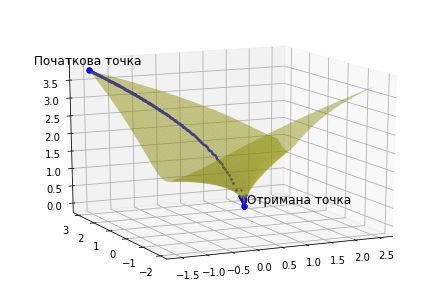


Отримана точка: (1.00058, 1.00132)
Кількість ітерацій: 6782
Час виконання: 30 сек


In [ ]:
print('Графік 8')

start = time.time()
mod_partan2(0.01, -1.5, 3, 0.001, 0.0001, 15)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

## Висновки


Зображена на графіку 1 коренева функція задається рівнянням $~z = (10(x - y)^{2} + (x-1)^2)^{1/4}$ . Її глобальний мінімум -   точка (1, 1), в якій вона набуває значення 0. Наведена функція є одним з прикладів функцій, для яких мінімізація градієнтними методами є нетривіальною задачею (ще один широко відомий приклад подібної функції - функція Розенброка).

На графіках 2, 3 бачимо, що застосування до кореневої функції методу найскорішого спуску з оптимальним кроком може давати неоднозначні результати, в залежності від початкової точки, критерію закінчення та інших параметрів.
Так в обидва наведених прикладах були отримані відносно точні результати, проте у випадку критерія закінчення $||\nabla f(x^{(k)})|| \leq \varepsilon$ (графік 2) протягом 15 секунд виконання циклу while цей критерій так і не був досягнутий.

Один із елементів модифікованого партан-методу (власне, як і ітераційного) - одновимірний пошук вздовж певгого напрямку (x2, y2) - (x1, y1). В даній роботі цей пошук на прикладі кореневої функції був реалізований у вигяді допоміжної функції min_with_direction. Приклад виконання цієї функції можна побачити на графіку 4 (візуалізація виконується із застосуванням функції min_with_direction_graph).

На графіках 5, 6 бачимо, що застосування до кореневої функції модифікованого партан-методу з критерієм закінчення $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases} $ дає стабільно точний результат. При цьому, відносно швидко досягаєтся критерій закінчення час виконання функції (пошук мінімуму та візуалізація результату) займає до 4 секунд.

На графіках 7, 8 бачимо, що при зміні критерію закінчення на  $||\nabla f(x^{(k)})|| \leq \varepsilon$ модифікований партан-метод продовжує давати відносно точний результат. Проте, в даному випадку, аналогічно до застосування "звичайного" методу найскорішого спуску, досягнення критерію закінчення може займати досить тривалий час.




## Автор

Лозко Олександр, група КМ-83

email: aleksandrlozko2018@gmail.com

## Посилання

**Список джерел, які було використано під час виконання курсової роботи:**

1. https://ru.m.wikipedia.org/wiki/Градиентный_спуск
2. https://studfile.net/preview/6215010/page:14/
3. https://www.google.com.ua/amp/s/www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/amp/
4. https://www.google.com.ua/amp/s/likegeeks.com/3d-plotting-in-python/amp/
5. http://dit.isuct.ru/IVT/sitanov/Literatura/M171/Pages/Glava1_3.htm
6. https://www.researchgate.net/publication/337600944_Research_on_Rosenbrock_Function_Optimization_Problem_Based_on_Improved_Differential_Evolution_Algorithm
7. https://www.brnt.eu/phd/node10.html
8. https://machinelearningmastery.com/tour-of-optimization-algorithms/
9. https://intuit.ru/studies/courses/61/61/lecture/20446?page=3